## Convert color space. part3

### 1. Loading image 

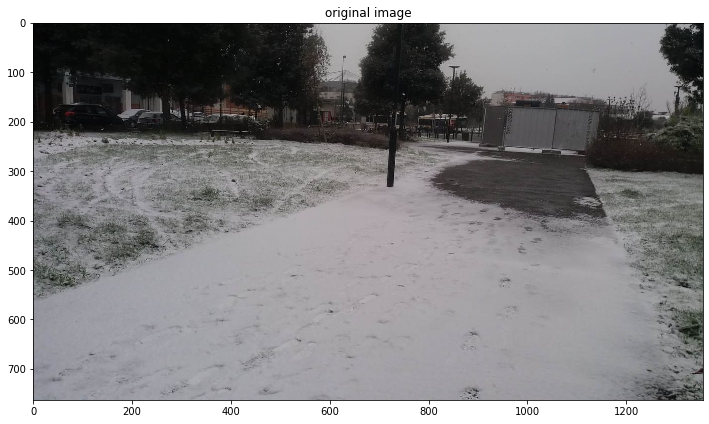

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\winter_1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (12, 7))
plt.imshow(img)
plt.title('original image')
plt.show()

#### 2. Define a function to display the output_image after plug-in pixel&chanel

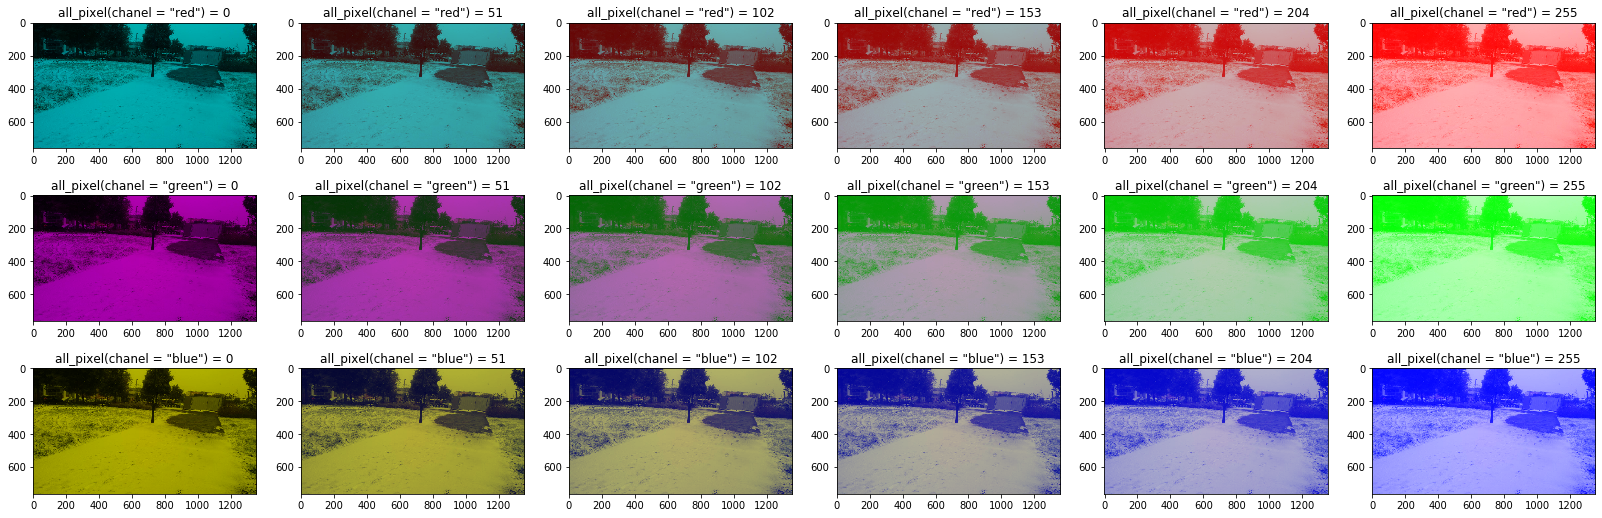

In [2]:
def fix_pixel_in_chanel_display(img_path, value, chanel=None):
    """ 
    This function converts the colored_images w.r.t various pixel_value and chanel
    Input_Args: 
        img_src (array) : source of image
        chanel (int from 0-2): coresponding to chanels {blue, green, red} of the image
        value (int from 0-255): value at each chanel input
    Return: an image which changed after plug in the parameter
    """
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    chanel_names = ['"red"', '"green"', '"blue"']
    if chanel != None:
        img[:, :, chanel] = value
    plt.title('all_pixel(chanel = %s) = %s'%(chanel_names[chanel], value))
    plt.imshow(img)

img_path = r"C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\winter_1.jpg"
values = [0, 51, 102, 153, 204, 255]
plt.figure(figsize = (28, 9) )
idx = 1
for c in range(3):
    for k in range(6):
        plt.subplot(3, 6, idx)
        fix_pixel_in_chanel_display(img_path, values[k], c)
        idx = idx + 1

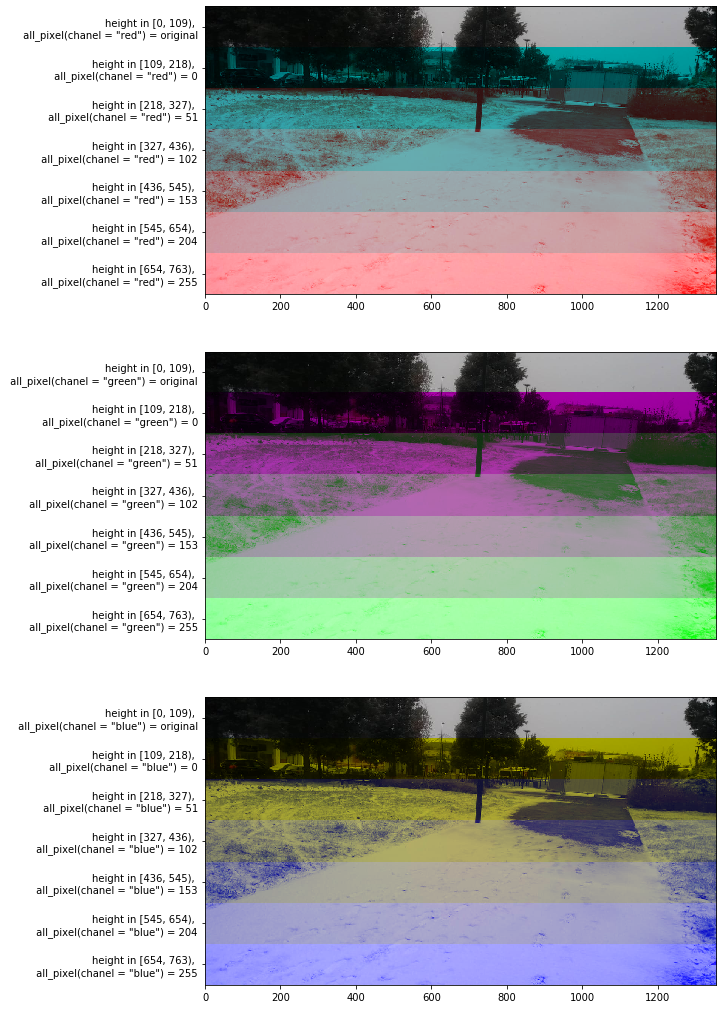

In [3]:
def split_colored_wrt_height(img_path, values_range, chanel_id):
    """
    
    """
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    chanel_names = ['"red"', '"green"', '"blue"']
    
    h, w = img.shape[:2]
    hp = h // (len(values_range) + 1)
    
    for k in range(6):
        img[hp * (k+1): hp*(k+2), :, chanel_id] = values_range[k]
    plt.imshow(img)
    Values = ['original'] + values_range
    vl = ['height in [%s, %s), \n all_pixel(chanel = %s) = %s'%(hp * k, hp*(k+1), chanel_names[chanel_id], Values[k]) for k in range(7)]
    plt.yticks([int((k+0.5)*h/7) for k in range(7)], vl)
plt.figure(figsize = (20, 18))
plt.subplot(311), split_colored_wrt_height(img_path, values, 0)
plt.subplot(312), split_colored_wrt_height(img_path, values, 1)
plt.subplot(313), split_colored_wrt_height(img_path, values, 2)
plt.show()

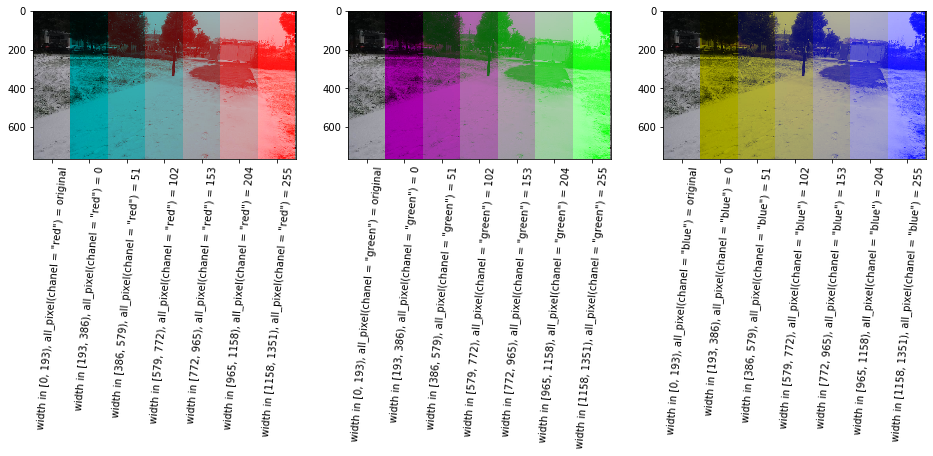

In [6]:
def split_colored_wrt_width(img_path, values_range, chanel_id):
    """
    
    """
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    chanel_names = ['"red"', '"green"', '"blue"']
    
    h, w = img.shape[:2]
    wp = w // (len(values_range) + 1)
    
    for k in range(6):
        img[:, wp * (k+1): wp*(k+2), chanel_id] = values_range[k]
    plt.imshow(img)
    Values = ['original'] + values_range
    vl = ['width in [%s, %s), all_pixel(chanel = %s) = %s'%(wp * k, wp*(k+1), chanel_names[chanel_id], Values[k]) for k in range(7)]
    plt.xticks([int((k+0.5)*w/7) for k in range(7)], vl, rotation=85)
plt.figure(figsize = (16, 12))
plt.subplot(131), split_colored_wrt_width(img_path, values, 0)
plt.subplot(132), split_colored_wrt_width(img_path, values, 1)
plt.subplot(133), split_colored_wrt_width(img_path, values, 2)
plt.show()